In [0]:
# import librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
conversion= pd.read_csv('conversion_data.csv')
conversion.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [0]:
conversion.isnull().any() # on verifie si le dataset à des valeurs manquantes

country                False
age                    False
new_user               False
source                 False
total_pages_visited    False
converted              False
dtype: bool

In [0]:
conversion.converted.value_counts()

0    306000
1     10200
Name: converted, dtype: int64

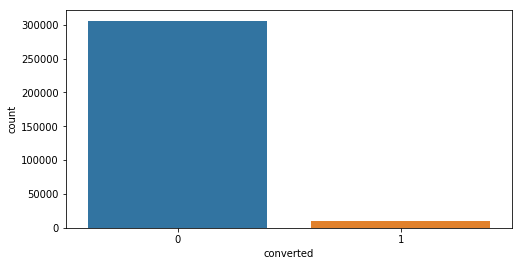

In [0]:
# Simple check to see if the number of conversion  and noconsersion are equivalent
plt.figure(figsize=(8,4))
sns.countplot(x='converted', data=conversion)

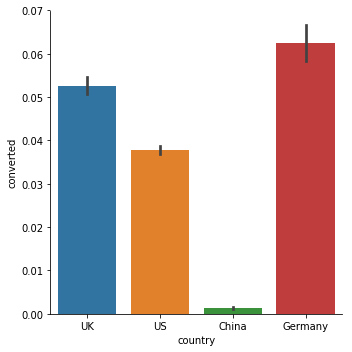

In [0]:
sns.catplot(x="country",  y="converted", dodge=False, data= conversion, kind="bar")
plt.show()

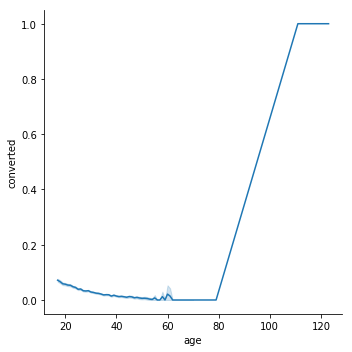

In [0]:
sns.relplot(x=conversion.columns[1], y=conversion.columns[-1], data=conversion, kind="line")

En regardant ce graphe, on peut voir qu'il y'a une convergence absolue vers 1 après. On peut faire mieux, en utilisant la boite à moustache pour enlever des valeurs aberrantes 

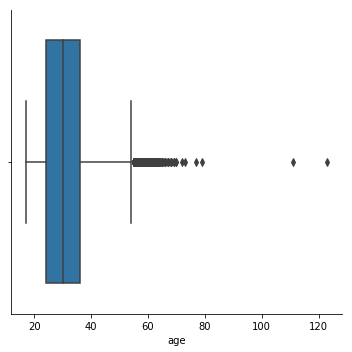

In [0]:
sns.catplot(x="age", data = conversion, kind= "box") 
plt.show()

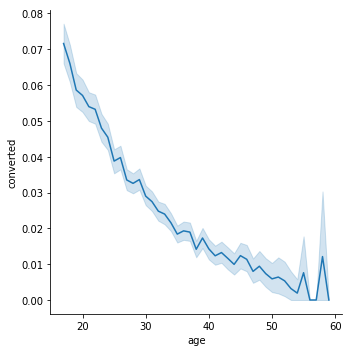

In [0]:
# On applique le masque pour supprimer les valeurs aberrantes
sns.relplot(x=conversion.columns[1], y=conversion.columns[-1], data=conversion[conversion.age < 60], kind="line")

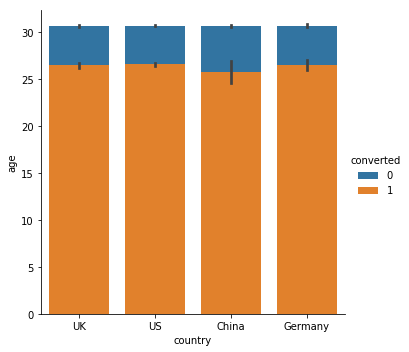

In [0]:
sns.catplot(x="country",  y= "age", hue ="converted", dodge=False, data= conversion, kind="bar")
plt.show()

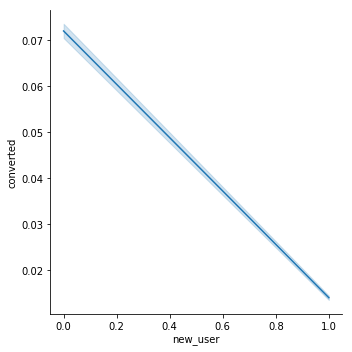

In [0]:
sns.relplot(x=conversion.columns[2], y=conversion.columns[-1], data=conversion, kind="line")

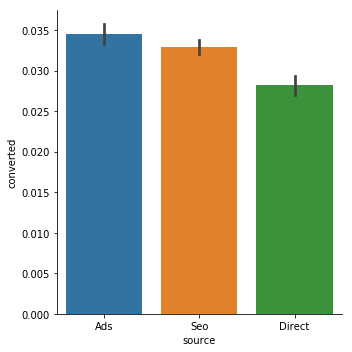

In [0]:
sns.catplot(x="source",  y="converted", dodge=False, data= conversion, kind="bar")
plt.show()

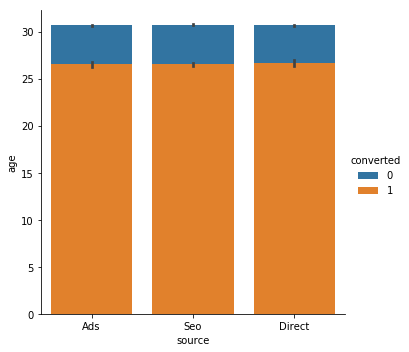

In [0]:
sns.catplot(x="source",  y= "age", hue ="converted", dodge=False, data= conversion, kind="bar") 
plt.show()

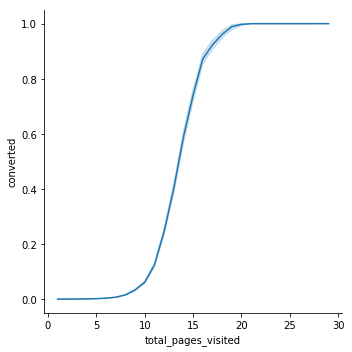

In [0]:
sns.relplot(x=conversion.columns[4], y=conversion.columns[-1], data=conversion, kind="line")

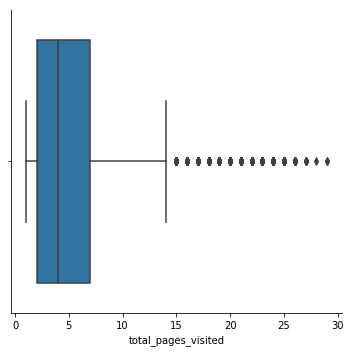

In [0]:
sns.catplot(x="total_pages_visited", data = conversion, kind= "box") 
plt.show()

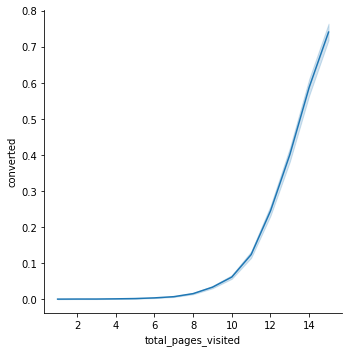

In [0]:
# On applique le masque pour supprimer les valeurs aberrantes
sns.relplot(x=conversion.columns[4], y=conversion.columns[-1], data=conversion[conversion.total_pages_visited < 16], kind="line")

In [0]:
# Dummyfication des villes 
dataset_dum= pd.get_dummies(conversion, drop_first=True) 
dataset_dum.head()

,age,new_user,total_pages_visited,converted,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,25,1,1,0,0,1,0,0,0
1,23,1,5,0,0,0,1,0,1
2,28,1,4,0,0,0,1,0,1
3,39,1,5,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,1


In [0]:
# Séparation des variables 
X = dataset_dum.loc[:, dataset_dum.columns != "converted"]
y = dataset_dum.loc[:, dataset_dum.columns == "converted"]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

In [0]:
## Oui il faut normaliser pour aider l'algorithme à faire ses prédictions

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [0]:
# Modele de regression Logistique 
print("Modèle de regression linéaire  ... ")
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression( )
print("....Done")
print("train set du modèle de regression logistic ...  ")
print()
classifier.fit(X_train, y_train)

Modèle de regression linéaire  ... 
....Done
train set du modèle de regression logistic ...  



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
print("Les scores de performance du modèle sur (X_train , y_train)...")
classifier_score = classifier.score(X_train,y_train)
print()
print("Score Classifier : {}  ".format(classifier_score)) 


Les scores de performance du modèle sur (X_train , y_train)...

Score Classifier : 0.9862022228246137  


In [0]:
print("Les scores de performance du modèle sur   (X_test , y_test)...")
classifier_score = classifier.score(X_test,y_test)
print()
print("Score Classifier : {}  ".format(classifier_score)) 


Les scores de performance du modèle sur   (X_test , y_test)...

Score Classifier : 0.9860531309297913  


In [0]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
y_test.mean() # permet de calculer le pourcentage de predire que des 1

converted    0.032258
dtype: float64

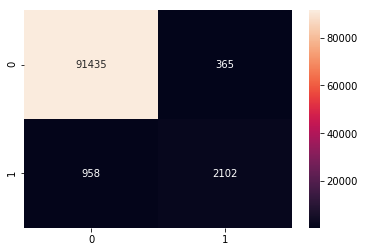

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

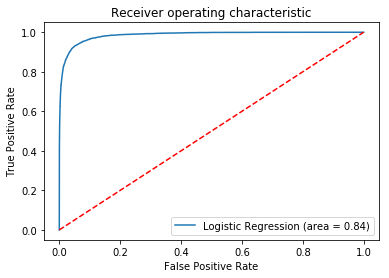

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [0]:
# Dummyfication des villes 
dataset= pd.get_dummies(conversion, drop_first=True) 
dataset.head()

,age,new_user,total_pages_visited,converted,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,25,1,1,0,0,1,0,0,0
1,23,1,5,0,0,0,1,0,1
2,28,1,4,0,0,0,1,0,1
3,39,1,5,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,1


In [0]:
dataset.converted.value_counts()

0    306000
1     10200
Name: converted, dtype: int64

In [0]:
# Séparation des variables 
X_b = dataset.loc[:, dataset.columns != "converted"]
y_b = dataset.loc[:, dataset.columns == "converted"]

In [0]:
from sklearn.model_selection import train_test_split
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size = 0.3, stratify = y_b, random_state = 42)

In [0]:
train_set = pd.concat([X_train_b, y_train_b], axis=1)
train_set.head()

,age,new_user,total_pages_visited,country_Germany,country_UK,country_US,source_Direct,source_Seo,converted
143925,40,0,4,0,0,0,1,0,0
150796,38,1,6,0,0,1,0,1,0
182781,33,1,4,0,0,1,0,0,0
125203,21,1,14,1,0,0,0,1,1
104046,28,1,7,0,1,0,1,0,0


In [0]:
nb_converted_0, nb_converted_1 = train_set.converted.value_counts()
nb_converted_0, nb_converted_1

(214200, 7140)

In [0]:
train_set_0 = train_set[train_set.converted == 0]
train_set_1 = train_set[train_set.converted == 1]

In [0]:
train_set_0 = train_set_0.sample(n=int(nb_converted_1*7/3)) # ici je fais une distribution 70-30 entre 0 et 1

In [0]:
dataset_new = pd.concat([train_set_0 , train_set_1], axis=0)
dataset_new.converted.value_counts()

0    16660
1     7140
Name: converted, dtype: int64

In [0]:
dataset_new.converted.head()

70219     0
268539    0
87472     0
152520    0
309733    0
Name: converted, dtype: int64

In [0]:
# Séparation des variables 
X_train_b = dataset_new.loc[:, dataset_new.columns != "converted"]
y_train_b = dataset_new.loc[:, dataset_new.columns == "converted"]

In [0]:
## Oui il faut normaliser pour aider l'algorithme à faire ses prédictions

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train_b = sc_x.fit_transform(X_train_b)
X_test_b = sc_x.transform(X_test_b)

In [0]:
# Modele de regression Logistique 
print("Modèle de regression Logistic  ... ")
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
print("....Done")
print("train set du modèle de regression logistic ...  ")
print()
classifier.fit(X_train_b, y_train_b)

Modèle de regression Logistic  ... 
....Done
train set du modèle de regression logistic ...  



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
print("Les scores de performance du modèle sur  (X_train_b , y_train_b)...")
classifier_score = classifier.score(X_train_b,y_train_b)
print()
print("Score Classifier : {}  ".format(classifier_score)) 


Les scores de performance du modèle sur  (X_train_b , y_train_b)...

Score Classifier : 0.9468487394957983  


In [0]:
print("Les scores de performance du modele sur   (X_test_b , y_test_b)...")
classifier_score = classifier.score(X_test_b,y_test_b)
print()
print("Score Classifier : {}  ".format(classifier_score)) 


Les scores de performance du modele sur   (X_test_b , y_test_b)...

Score Classifier : 0.9652751423149906  


In [0]:
y_test_b.mean() # permet de calculer le parcentage de predire que des 1

converted    0.032258
dtype: float64

In [0]:
y_pred_b = classifier.predict(X_test_b)
y_pred_b

array([0, 0, 0, ..., 0, 0, 0])

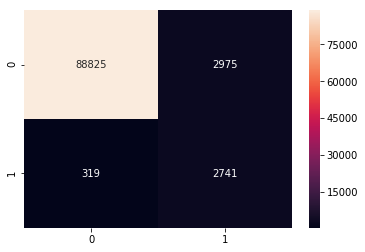

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_b, y_pred_b)
sns.heatmap(cm, annot=True, fmt="d")

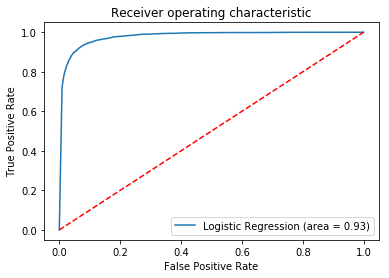

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_b, y_pred_b)
fpr, tpr, thresholds = roc_curve(y_test_b, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [0]:
from sklearn.feature_selection import chi2
feature_importance = chi2(X_b, y_b)
feature_importance 

(array([5.58042574e+03, 2.30914908e+03, 2.02697509e+05, 3.82500000e+02,
        6.44210526e+02, 1.75257732e+02, 3.87887324e+01, 2.01315789e+00]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 3.55366590e-085,
        4.05710472e-142, 5.25926285e-040, 4.72245974e-010, 1.55940432e-001]))

In [0]:
feature_ranking = pd.DataFrame(columns=X_b.columns, data=feature_importance, index=["Chi2 Score", "P-value"]).transpose()
feature_ranking.sort_values("Chi2 Score", ascending=False)

,Chi2 Score,P-value
total_pages_visited,202697.509485,0.000000e+00
age,5580.425744,0.000000e+00
new_user,2309.149077,0.000000e+00
country_UK,644.210526,4.057105e-142
country_Germany,382.500000,3.553666e-85
country_US,175.257732,5.259263e-40
source_Direct,38.788732,4.722460e-10
source_Seo,2.013158,1.559404e-01


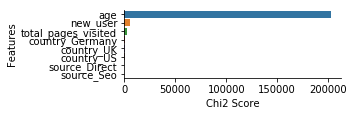

In [0]:
ax =sns.catplot(x="Chi2 Score", y=[index for index in feature_ranking.index], data = feature_ranking.sort_values("Chi2 Score", ascending=False), kind="bar")
ax.set(xlabel="Chi2 Score", ylabel="Features")
plt.show()